In [1]:
import sys

import matplotlib.pyplot as plt

# from thom import *
from thom.maps import *

%load_ext autoreload
%autoreload 2

In [3]:
model.params

{'a': 1.0, 'gamma': 1.0, 'b': 0.5, 't': 1.5}

In [2]:
model = BlinkingVortex()
# model.ic = np.array([0.15, 0.766241])
# model.ic = np.array([[0.15, 0.766241], [0.15, 0.766241]])
# model.t *= 0.93


# model.ic = model.ic.astype(np.longdouble)
# for param_name in model.params.keys():
#     val = getattr(model, param_name)
#     val_precise = np.array(val).astype(np.longdouble)
#     setattr(model, param_name, val_precise)
    

# from decimal import *
# getcontext().prec = 100
# for param_name in model.params.keys():
#     val = getattr(model, param_name)
#     val_precise = Decimal(str(val))
#     setattr(model, param_name, val_precise)
    
# model.ic = [0.1, np.pi/4]

sol = model.make_trajectory(1000)

# plt.plot(sol[:, 0], sol[:, 1], '.k')

xx, yy = sol[:, 0]*np.cos(sol[:, 1]), sol[:, 0]*np.sin(sol[:, 1])


# plt.plot(xx, yy, '.k', markersize=0.1)
plt.plot(xx, yy, '.k', markersize=2)

plt.xlim([-1, 1])
plt.ylim([-1, 1])
# plt.plot(xx[0], yy[0], '.r')

TypeError: _rhs() missing 1 required positional argument: 't'

In [3]:
model = Baker()
sol = model.make_trajectory(1000)

vals = sol[600:700]
vals1 = [model.rhs(item) for item in vals]
vals2 = [model.rhs_inv(item) for item in vals1]


plt.plot(np.array(vals2)[:, 0], np.array(vals2)[:, 0], '-')
plt.plot(np.array(vals2)[:, 0], vals[:, 0], '.')


IndexError: too many indices for array

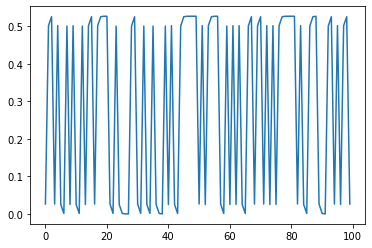

In [18]:
plt.plot(vals[:, 1])

In [7]:
pp = [2, 9]

def ff(a, b):
    return a*b

ff(*pp)

18

4.5e-05
4.5e-05
0.500045
0.500045


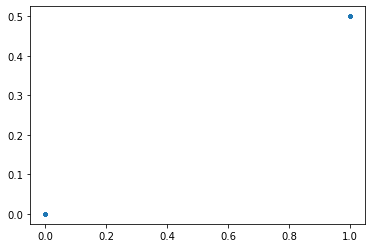

In [61]:
xx = np.linspace(0, 1, 1000)

xflr = (1.9999999999999 * xx) // 1

yp = 0.0001
a = 0.9
yy = (a * yp + xflr) / 2

print(yy[0])
print(yp * a / 2)

print(yy[-1])
print(0.5 + yp * a / 2)
plt.plot(xflr, yy, '.')

In [1]:
import sys

import matplotlib.pyplot as plt

# from thom import *
from thom.maps import *

%load_ext autoreload
%autoreload 2

[0.4 0.9]
0.4 0.6 

0.4 0.19999999999999996


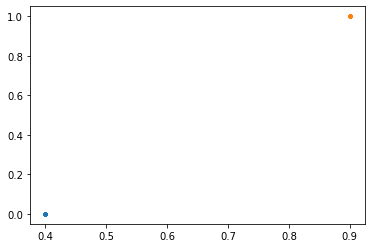

In [37]:
xx = np.linspace(0, 1, 1000)

eps2 = 2.0 - 1e-10
x_flr = (eps2 * xx) // 1

a = 1.0
y = 0.8

yp = (a * y + x_flr) / 2

print(np.unique(yp))
print(y/2, 1 - y/2, '\n')

if y < 0.5:
    print(y/2, 1 - y/2)
else:
    print(y/2, 1 - y/2 - 0.4)
    
plt.plot(yp[yp < 0.5], x_flr[yp < 0.5], '.')

plt.plot(yp[yp > 0.5], x_flr[yp > 0.5], '.')


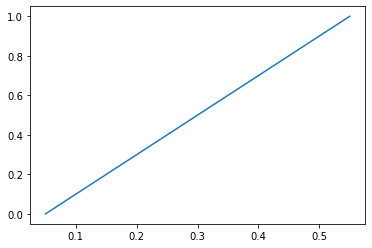

In [21]:
plt.plot(yp, x_flr)

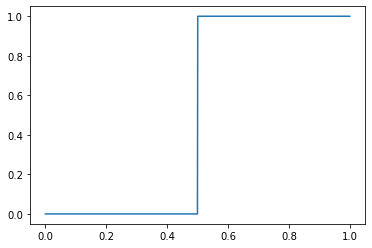

In [13]:
yp > 0.5

In [3]:
model.rhs_inv(model.rhs(np.array([0.01, 0.1])))

array([[ 0.2725, -0.425 ]])

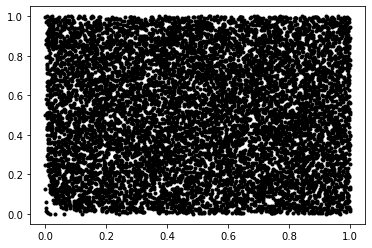

In [2]:
model = Baker()

sol = model.make_trajectory(10000)

plt.plot(sol[0, :, 0], sol[0, :, 1], '.k')

In [5]:
qq = np.random.random((50, 3))

qq2 = np.vstack([qq, [0, 3, 4]])
print(qq2.shape)

(51, 3)


In [5]:
model = Gauss()
model.b = -0.5
model.a *= 2

sol = model.make_trajectory(10000)

plt.plot(sol[:-1], sol[1:], '.k')

TypeError: too many arguments: expected 3, got 4

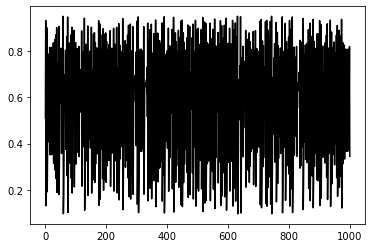

In [11]:
model = Tent()

sol = model.make_trajectory(1000)

plt.plot(sol, 'k')

ValueError: x and y can be no greater than 2-D, but have shapes (1,) and (1, 101, 1)

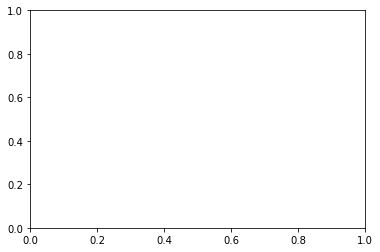

In [4]:
model = Logistic()

sol = model.make_trajectory(100)

plt.plot(sol, 'k')

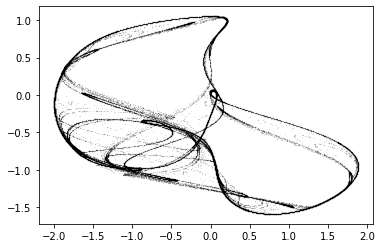

In [2]:
model = DeJong()

sol = model.make_trajectory(50000)
plt.plot(sol[0, :, 0], sol[0, :, 1], '.k', markersize=0.1)

In [8]:
model.rhs(np.array(model.ic))

array([[0.19700164, 0.29700164]])

In [7]:
model.rhs_inv(model.rhs(np.array(model.ic)))

array([[0.1, 0.1]])

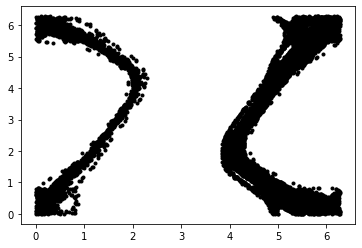

In [3]:
model = Chirikov()

sol = model.make_trajectory(10000)
plt.plot(np.mod(sol[0, :, 0], 2*np.pi), np.mod(sol[0, :, 1], 2*np.pi), '.k')

# model.ic =  2 * np.pi * np.random.random((80, 2)) # uniform random initial conditions
# sol = model.make_trajectory(20000)

# plt.figure(figsize=(20, 20))
# plt.plot(np.mod(sol.T[0], 2*np.pi), np.mod(sol.T[1], 2*np.pi), '.k', markersize=1, alpha=0.1);

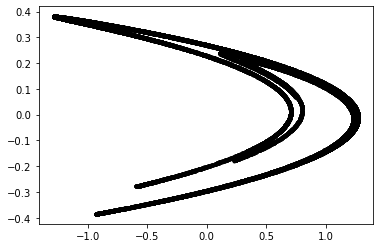

In [4]:
model = Henon()

sol = model.make_trajectory(20000)

plt.plot(sol[0, :, 0], sol[0, :, 1], '.k')

In [7]:
model.ic = np.array([[0.15, 0.766241], [0.25, 0.796241]])

sol = model.make_trajectory(20000)

[[[0.15     0.766241]]

 [[0.25     0.796241]]]


TypeError: tuple indices must be integers or slices, not tuple

In [62]:
sol[:4]

array([[ 0.15      ,  0.76624211],
       [ 0.41218245, -0.82309582],
       [ 0.74610158,  0.19406399],
       [ 0.27238371,  0.90397858]])

In [60]:
model.rhs(0.15, np.pi/4.1)

TypeError: __call__() takes 2 positional arguments but 3 were given

In [62]:
len(np.array(1).shape)

len(np.array([0, 1, 2]).shape)

len(np.array([[0.15, 0.766241], [0.15, 0.766241]]))

2

In [64]:
qq = 0

if qq < 1: qq = 1
    
print(qq)

1


In [34]:
model.t

array(1.5, dtype=float128)

In [55]:
sol = model.make_trajectory(1000, ic=np.array([[0.15, 0.766241], [0.15, 0.766241]]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

(-1.0, 1.0)

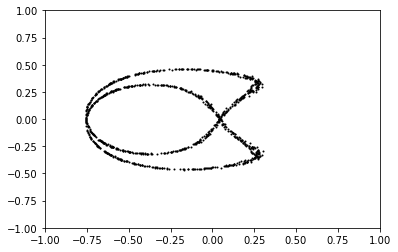

In [54]:
model = BlinkingVortex()
model.ic = np.array([0.15, 0.766241])
# model.ic = np.array([[0.15, 0.766241], [0.15, 0.766241]])
# model.t *= 0.93


# model.ic = model.ic.astype(np.longdouble)
# for param_name in model.params.keys():
#     val = getattr(model, param_name)
#     val_precise = np.array(val).astype(np.longdouble)
#     setattr(model, param_name, val_precise)
    

# from decimal import *
# getcontext().prec = 100
# for param_name in model.params.keys():
#     val = getattr(model, param_name)
#     val_precise = Decimal(str(val))
#     setattr(model, param_name, val_precise)
    
# model.ic = [0.1, np.pi/4]

sol = model.make_trajectory(1000)

# plt.plot(sol[:, 0], sol[:, 1], '.k')

xx, yy = sol[:, 0]*np.cos(sol[:, 1]), sol[:, 0]*np.sin(sol[:, 1])


# plt.plot(xx, yy, '.k', markersize=0.1)
plt.plot(xx, yy, '.k', markersize=2)

plt.xlim([-1, 1])
plt.ylim([-1, 1])
# plt.plot(xx[0], yy[0], '.r')

## xx, yy = sol[:, 0]*np.cos(sol[:, 0]), sol[:, 0]*np.sin(sol[:, 0])

plt.plot(xx, yy, '.k')

In [1]:
sol[-1]

NameError: name 'sol' is not defined

In [3]:
from math import pi

print(pi)

3.141592653589793


In [4]:
pi = Decimal("3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093844609550582231725359408128481117450284102701938521105559644622948954930381964428810975665933446128475648233")

pi

NameError: name 'Decimal' is not defined

In [7]:
all_vals = [[0.1, 0.2]]

for i in range(100):
    all_vals.append(model(all_vals[-1]))

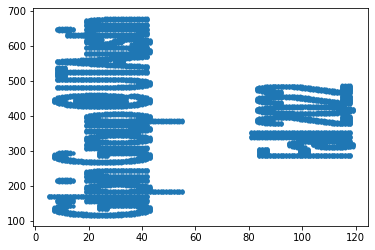

In [53]:
im = plt.imread("/Users/williamgilpin/Desktop/misc/lab.png")[..., 0]
xx, yy = np.where(im < 1.0)

plt.plot(xx, yy, '.')